In [3]:
from skimage.io import imread
from sklearn.neighbors import KDTree
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

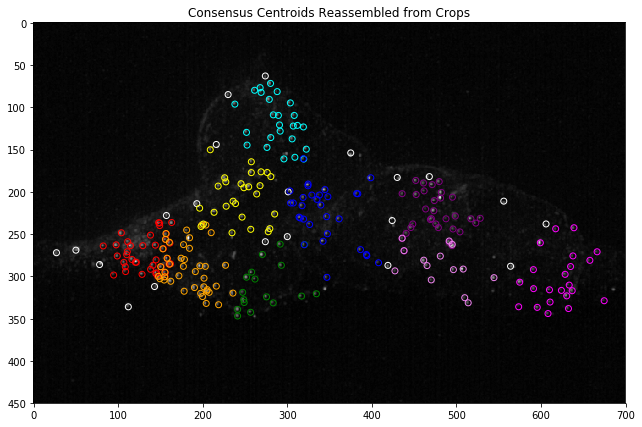

In [35]:
plt.figure(figsize=(12,7))
coords_blacked = np.asarray(pd.read_csv('/Users/jenny.vo-phamhi/Documents/insta_paper/figures/SI/fig_5c/datasets/consensus/smfish_blacked_coords.csv'))
for coord in coords_blacked:
    plt.scatter(coord[0], 450-coord[1], edgecolors='white', facecolors='None')

colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'violet', 'magenta']    
for i in range(9):
    coords = np.asarray(pd.read_csv('./datasets/consensus/smfish_' + str(i) + '_coords.csv'))
    stats = np.asarray(pd.read_csv('./datasets/consensus/smfish_' + str(i) + '.csv', header=None))
    xmin = stats[0][0]
    ymin = stats[2][0]
    ymax = stats[3][0]
    height = ymax - ymin
    zoom_factor = stats[4][0]

    refit = []
    for coord in coords:
        x = coord[0]/zoom_factor + xmin
        y = height - coord[1]/zoom_factor + ymin
        refit.append([x, y])
        total.append([x, y])
    refit = np.asarray(refit)

    for coord in refit:
        plt.scatter(coord[0], coord[1], edgecolors=colors[i], facecolors='None')

plt.title('Consensus Centroids Reassembled from Crops')
plt.gca().invert_yaxis()
plt.imshow(im, cmap='gray')
plt.show()

In [9]:
clustering_params = ['AffinityPropagation', -350]
declumping_params = ['KMeans', 2]

img_filename = 'C2-ISP_293T_TFRC_InSituPrep_20180712_1_MMStack_Pos0_700.png'
img_filepath = './datasets/images/smfish.png'
json_filepath = './datasets/anno/smFISH_cells.json'
ref_filepath = './datasets/ref/smFISH_ref.csv'

im = imread(img_filepath)
img_height = len(im)

In [10]:
consensus_with_cropping = np.asarray(pd.read_csv('./datasets/consensus/coords_with_cropping.csv'))
consensus_no_cropping = np.asarray(pd.read_csv('./datasets/consensus/coords_no_cropping.csv'))

In [11]:
correctness_threshold = 4

In [12]:
reference_coords = np.asarray(pd.read_csv(ref_filepath))[:,:2]
reference_kdt = KDTree(reference_coords, leaf_size=2, metric='euclidean')

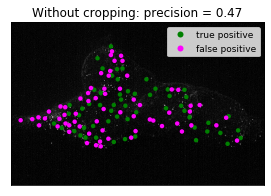

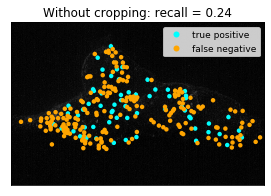

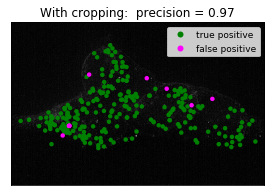

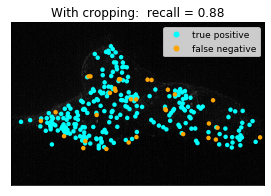

In [15]:
for i in [0,1]:
        
    consensus_coords = consensus_no_cropping if i==0 else consensus_with_cropping
    s = 'Without cropping:' if i==0 else 'With cropping: '
    
    consensus_kdt = KDTree(consensus_coords, leaf_size=2, metric='euclidean')

    correct_consensus = []
    incorrect_consensus = []
    detected_reference = []
    undetected_reference = []

    # correct vs. incorrect

    for consensus_coord in consensus_coords:
        dist, ind = reference_kdt.query([consensus_coord], k=1)
        if dist[0][0] < correctness_threshold:
            correct_consensus.append(consensus_coord)
        else:
            incorrect_consensus.append(consensus_coord)

    # detected vs. undetected

    for reference_coord in reference_coords:
        dist, ind = consensus_kdt.query([reference_coord], k=1)
        if dist[0][0] < correctness_threshold:
            detected_reference.append(reference_coord)
        else:
            undetected_reference.append(reference_coord)
    
    precision = len(correct_consensus)/len(consensus_coords)
    recall = len(detected_reference)/len(reference_coords)
    
    markersize = 20
    
    # plot Precision
    plt.figure(figsize=(5,3))
    for x, y in correct_consensus:
        plt.scatter(x, y, edgecolors='None', facecolors='green', s=markersize)
    for x, y in incorrect_consensus:
        plt.scatter(x, y, edgecolors='None', facecolors='magenta', s=markersize)
    plt.gca().invert_yaxis()
    plt.imshow(im, cmap='gray')
    
    handle1 = Line2D([0],[0], marker='o', color='None', markerfacecolor='green', markeredgecolor='None', label='true positive')
    handle2 = Line2D([0],[0], marker='o', color='None', markerfacecolor='magenta', markeredgecolor='None', label='false positive')
    legend = plt.legend(handles=[handle1, handle2], loc='upper right', frameon=1, prop={'size': 9})
    frame = legend.get_frame()
    frame.set_facecolor('white')
    
    title = '%s precision = %s' % (s, round(precision, 2))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(title + '.pdf', transparent=True, bbox_inches="tight")
    plt.show()
    
    # plot Recall
    plt.figure(figsize=(5,3))
    for x, y in detected_reference:
        plt.scatter(x, y, edgecolors='None', facecolors='cyan', s=markersize)
    for x, y in undetected_reference:
        plt.scatter(x, y, edgecolors='None', facecolors='orange', s=markersize)
    plt.gca().invert_yaxis()
    plt.imshow(im, cmap='gray')
    
    handle1 = Line2D([0],[0], marker='o', color='None', markerfacecolor='cyan', markeredgecolor='None', label='true positive')
    handle2 = Line2D([0],[0], marker='o', color='None', markerfacecolor='orange', markeredgecolor='None', label='false negative')
    legend = plt.legend(handles=[handle1, handle2], loc='upper right', frameon=1, prop={'size': 9})
    frame = legend.get_frame()
    frame.set_facecolor('white')
    
    title = '%s recall = %s' % (s, round(recall, 2))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(title + '.pdf', transparent=True, bbox_inches="tight")
    plt.show()
        